In [1]:
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.config import model_output_path
from vierlinden.model.model import NHiTSTrainingWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE
import torch

target = 'PV_18_Fuellstand_RUEB_1_ival'
model_filepath = model_output_path + "/NHiTS_"  + target + "_model.pt"

seed = 42

context_length = 50
prediction_length = 10
batch_size = 128
num_workers = 8 #18

dp = VierlindenDataProcessor()
vierlinden_data = dp.load_processed_data()
vierlinden_data = dp.prepare_for_target(vierlinden_data, target)

train_data, test_data = dp.split_data(vierlinden_data, split_date='2023-01-01')

INFO:vierlinden.data.loader:Data loaded successfully from E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/data
INFO:vierlinden.data.loader:Datetime processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


In [2]:
cuda = torch.cuda.is_available()
print(f'Cuda available: {cuda}')

if cuda:
    print(f'Used GPU device: {torch.cuda.get_device_name(0)}')

    # Set the matrix multiplication precision to 'medium' for better performance uses tensor cores
    torch.set_float32_matmul_precision('medium')

Cuda available: True
Used GPU device: NVIDIA GeForce RTX 3070


In [3]:
train_from_beginning = True

nhits_wrapper = NHiTSTrainingWrapper(train_data, 
                                    target_col = target, 
                                    context_length = context_length, 
                                    prediction_length = prediction_length, 
                                    batch_size = batch_size, 
                                    num_workers = num_workers)
optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)

print(f"Optimal learning rate: {optimal_lr}")

if train_from_beginning:
    best_model = nhits_wrapper.train(optimal_lr, loss = MASE(), seed = seed)
else:
    ckpt_path = "E:/Users/Vipin/Documents/BHT/CalgoLab/RIWWER/model_output/training_logs/lightning_logs/version_0/checkpoints/epoch=86-step=9483.ckpt"
    best_model = nhits_wrapper.continue_training_from_ckpt(ckpt_path=ckpt_path,
                                                           learning_rate=optimal_lr,
                                                           loss=MASE(),
                                                           seed=seed
                                                           )

INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
INFO:vierlinden.model.model:Start setting up trainer and network.
Seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.


Optimal learning rate: 7.07945784384138e-05



  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | MASE           | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Metric val_loss improved. New best score: 4.015


Validation: |                                                                                                 …

Metric val_loss improved by 0.235 >= min_delta = 0.0001. New best score: 3.780


Validation: |                                                                                                 …

Metric val_loss improved by 0.126 >= min_delta = 0.0001. New best score: 3.654


Validation: |                                                                                                 …

Metric val_loss improved by 0.056 >= min_delta = 0.0001. New best score: 3.598
Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Validation: |                                                                                                 …

Metric val_loss improved by 0.016 >= min_delta = 0.0001. New best score: 3.582


Validation: |                                                                                                 …

Metric val_loss improved by 0.024 >= min_delta = 0.0001. New best score: 3.558


Validation: |                                                                                                 …

Metric val_loss improved by 0.013 >= min_delta = 0.0001. New best score: 3.546


Validation: |                                                                                                 …

Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 3.536


Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.533


Validation: |                                                                                                 …

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 3.525


Validation: |                                                                                                 …

Metric val_loss improved by 0.013 >= min_delta = 0.0001. New best score: 3.512


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.509


Validation: |                                                                                                 …

Metric val_loss improved by 0.012 >= min_delta = 0.0001. New best score: 3.498


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.495


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.494


Validation: |                                                                                                 …

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 3.485


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.008 >= min_delta = 0.0001. New best score: 3.477


Validation: |                                                                                                 …

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 3.473


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.471


Validation: |                                                                                                 …

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 3.467


Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.467


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.464


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 3.457


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.454


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.452


Validation: |                                                                                                 …

Metric val_loss improved by 0.006 >= min_delta = 0.0001. New best score: 3.445


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.444


Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.444


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.442


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.440


Validation: |                                                                                                 …

Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 3.435


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.433


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.431


Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.431


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.429


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.428


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.425


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.425


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.425


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.423


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.421


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.419


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.419


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.417


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.414


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.413


Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.412


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.002 >= min_delta = 0.0001. New best score: 3.410


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 3.406


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.406


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.403


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.402


Validation: |                                                                                                 …

Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.401


Validation: |                                                                                                 …

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 3.401


Validation: |                                                                                                 …

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 3.400


Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


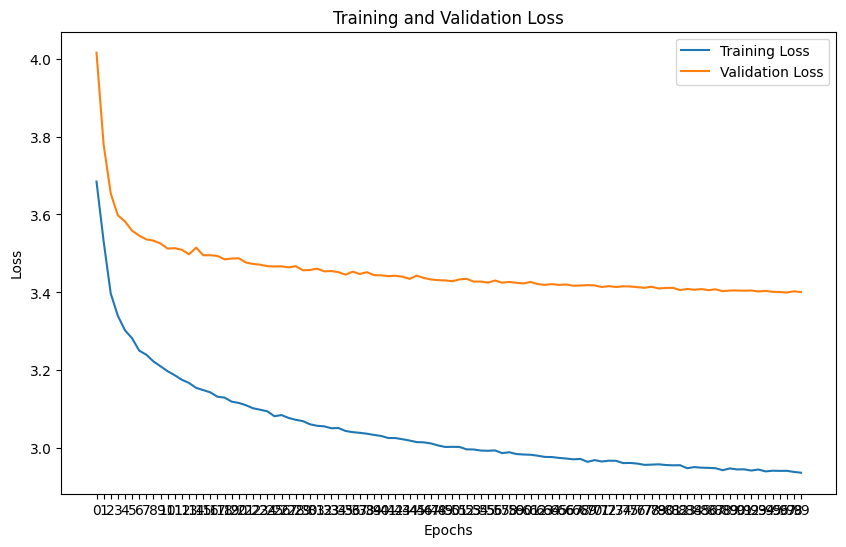

In [4]:
nhits_wrapper.save_trained_model(model_filepath)
nhits_wrapper.plot_training_result()

Baseline MASE: 4.350091022898348


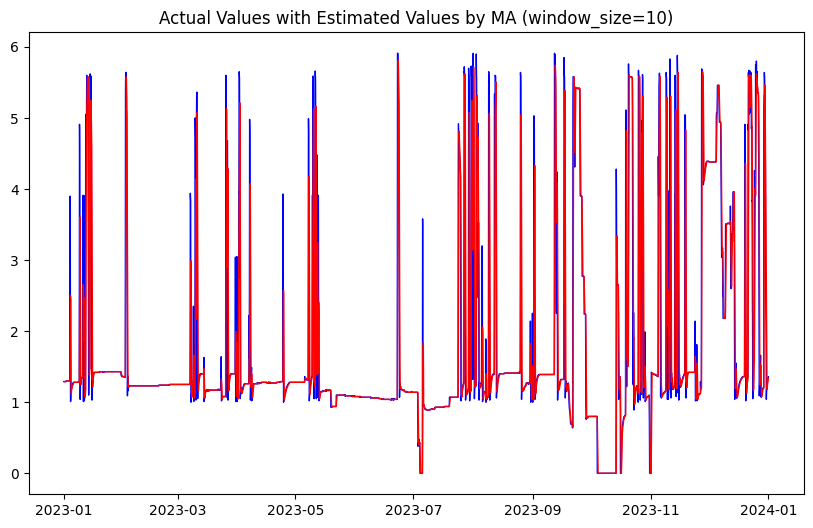

In [5]:
from vierlinden.model.model import MovingAverageBaseline

model = MovingAverageBaseline(test_data, window_size=10, target_col=target, forecast_step_ahead=1)
mase = model.calculate_mase()

print(f'Baseline MASE: {mase}')
model.plot_forecast()

In [6]:
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper

model = NHiTSTrainingWrapper.load_trained_model(model_filepath)
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col=target)

if test_data is None:
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, target)
    training_df, test_df = dp.split_data(df, split_date='2023-01-01')
    
prediction_df = prediction_wrapper.predict(test_data)
mase = prediction_wrapper.calculate_mase_loss(1)

print("MASE = ", mase)

E:\Users\Vipin\Documents\BHT\CalgoLab\RIWWER\UT_RIWWER_project\vierlinden\model\model.py:726: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.fillna(0, inplace=True)
e:\Users\Vipin\Documents\BHT\CalgoLab\RIWWER\.venv\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


MASE =  1.0290093917039966


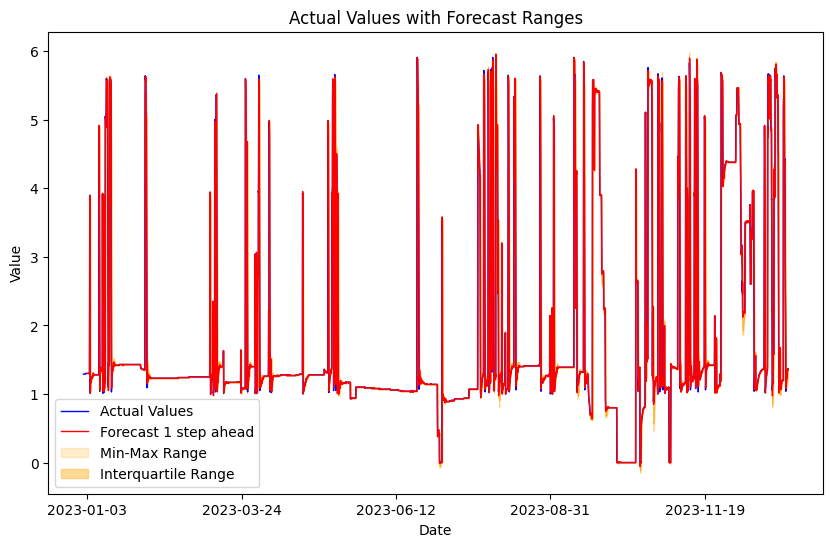

In [7]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

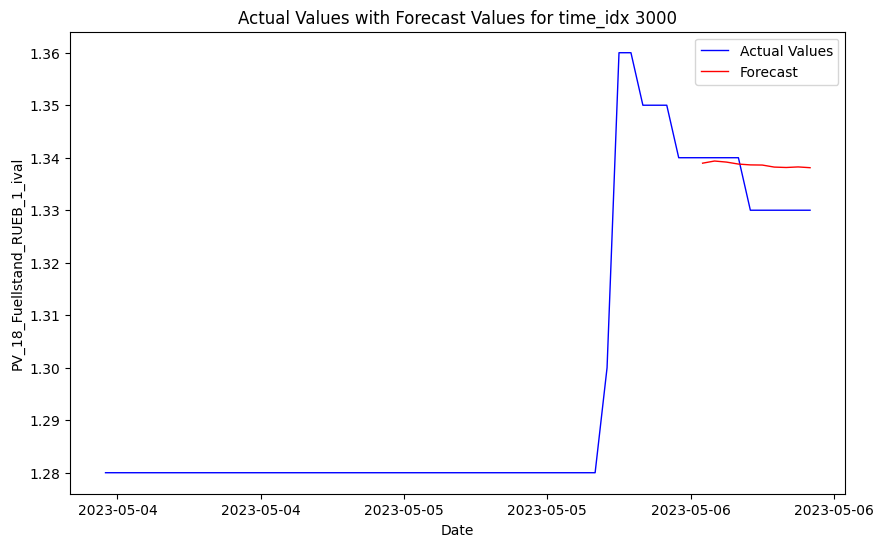

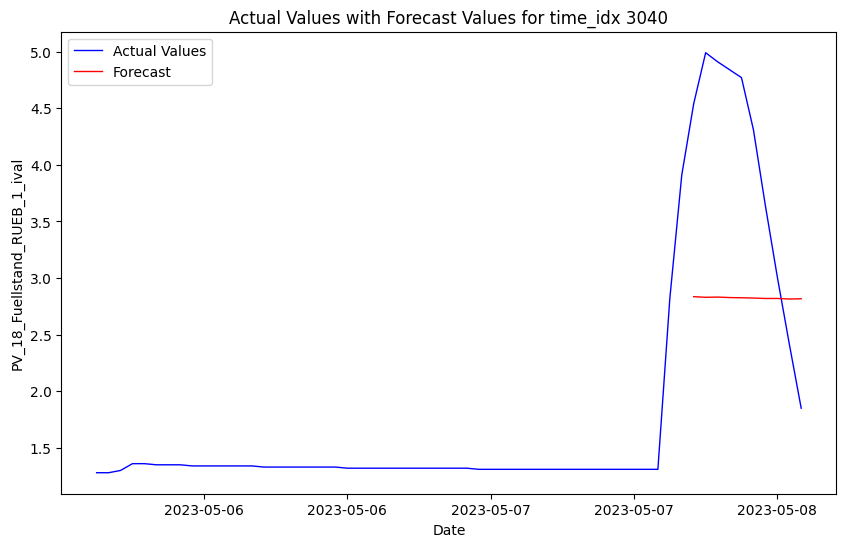

In [30]:
prediction_wrapper.plot_forecast_per_time_idx(3000)
prediction_wrapper.plot_forecast_per_time_idx(3040)